In [1]:
import numpy as np

class Layer:
    def forward(self, input):
        raise NotImplementedError

    def backward(self, output_gradient, learning_rate):
        raise NotImplementedError


class LinearLayer(Layer):
    def __init__(self, input_size, output_size):
        self.weights = np.random.rand(input_size, output_size)
        self.bias = np.zeros((1, output_size))

    def forward(self, input):
        self.input = np.array(input, dtype=np.float64)
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output

    def backward(self, output_gradient, learning_rate):
        input_gradient = np.dot(output_gradient, self.weights.T)
        weights_gradient = np.dot(self.input.T, output_gradient)
        bias_gradient = np.sum(output_gradient, axis=0, keepdims=True)
        self.weights -= learning_rate * weights_gradient
        self.bias -= learning_rate * bias_gradient
        return input_gradient

    def get_weights(self):
        return self.weights, self.bias

    def set_weights(self, weights_and_bias):
        self.weights, self.bias = weights_and_bias

class SigmoidLayer(Layer):
    def forward(self, input):
        self.input = input
        self.output = self.sigmoid(input)
        return self.output

    def sigmoid(self, x):
        x_clip = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x_clip))

    def backward(self, output_gradient, learning_rate):
        sigmoid_derivative = self.output * (1 - self.output)
        return output_gradient * sigmoid_derivative
    

    def backward(self, output_gradient, learning_rate):
        sigmoid_gradient = self.output * (1 - self.output)
        return output_gradient * sigmoid_gradient

class TanhLayer(Layer):
    def __init__(self):
        pass

    def tanh(self, x):
        return np.tanh(x)

    def forward(self, input):
        self.input = input
        self.output = self.tanh(input)
        return self.output

    def backward(self, output_gradient, learning_rate):
        tanh_gradient = 1 - np.square(self.output)
        return output_gradient * tanh_gradient

class SoftmaxLayer(Layer):
    def __init__(self):
        pass

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def forward(self, input):
        self.input = input
        self.output = self.softmax(input)
        return self.output

    def backward(self, output_gradient, learning_rate):
        return output_gradient

class CrossEntropyLoss(Layer):
    def __init__(self):
        super().__init__()
        self.predictions = None
        self.targets = None

    def forward(self, predicted, target):
        self.input = predicted 
        self.predictions = predicted
        self.targets = target
        epsilon = 1e-15
        predicted = np.clip(predicted, epsilon, 1 - epsilon)
        loss = -np.sum(target * np.log(predicted)) / len(predicted)
        return loss

    def backward(self, output_gradient, learning_rate):
        epsilon = 1e-15
        output_gradient /= (self.input + epsilon)  
        return -self.targets / self.input

class Sequential(Layer):
    def __init__(self):
        self.layers = []

    def add(self, layer):
        self.layers.append(layer)

    def forward(self, input):
        output = input
        for layer in self.layers:
            output = layer.forward(output)
        return output

    def backward(self, output_gradient, learning_rate):
        for layer in reversed(self.layers):
            output_gradient = layer.backward(output_gradient, learning_rate)
        return output_gradient

    def save_weights(self, filename):
        for i, layer in enumerate(self.layers):
            if hasattr(layer, 'weights') and hasattr(layer, 'bias'):
                np.save(f'{filename}_layer{i}_weights.npy', layer.weights)
                np.save(f'{filename}_layer{i}_bias.npy', layer.bias)

    def load_weights(self, filename):
        for i, layer in enumerate(self.layers):
            if hasattr(layer, 'weights') and hasattr(layer, 'bias'):
                layer.weights = np.load(f'{filename}_layer{i}_weights.npy')
                layer.bias = np.load(f'{filename}_layer{i}_bias.npy')


In [2]:
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[0],
              [1],
              [1],
              [0]])

np.random.seed(42)
model = Sequential()
model.add(LinearLayer(input_size=2, output_size=2)) 
model.add(SigmoidLayer()) 
model.add(LinearLayer(input_size=2, output_size=1)) 
model.add(SigmoidLayer()) 
learning_rate = 0.1
epochs = 10000

for epoch in range(epochs):
    predictions = model.forward(X)
    loss_layer = CrossEntropyLoss()
    loss = loss_layer.forward(predictions, y)
    output_gradient = loss_layer.backward(1, learning_rate)
    model.backward(output_gradient, learning_rate)
    if epoch % 1000 == 0:
        print(f'Epoch: {epoch}, Loss: {loss:.4f}')

model.save_weights('XOR_solved')
test_input = np.array([[0, 0],
                       [0, 1],
                       [1, 0],
                       [1, 1]])

predicted_output = model.forward(test_input)
print('Predicted XOR output:')
print(predicted_output)


Epoch: 0, Loss: 0.2978
Epoch: 1000, Loss: 0.0010
Epoch: 2000, Loss: 0.0005
Epoch: 3000, Loss: 0.0003
Epoch: 4000, Loss: 0.0002
Epoch: 5000, Loss: 0.0002
Epoch: 6000, Loss: 0.0002
Epoch: 7000, Loss: 0.0001
Epoch: 8000, Loss: 0.0001
Epoch: 9000, Loss: 0.0001
Predicted XOR output:
[[0.99950743]
 [0.99981859]
 [0.99981722]
 [0.99988554]]


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
import math
import numpy as np

def haversine_distance(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6371 * c
    return km


In [4]:
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

class NeuralNetwork:
    def __init__(self, input_size, hidden_nodes, nodes_per_layer, output_size, activation_function):
        self.hidden_layer = LinearLayer(input_size, hidden_nodes)
        self.hidden_activation = activation_function()
        self.hidden_layers = []
        for _ in range(nodes_per_layer - 1):
            self.hidden_layers.append(LinearLayer(hidden_nodes, hidden_nodes))
        self.output_layer = LinearLayer(hidden_nodes, output_size)

    def forward(self, input):
        hidden_output = self.hidden_layer.forward(input)
        hidden_output = self.hidden_activation.forward(hidden_output)
        for layer in self.hidden_layers:
            hidden_output = layer.forward(hidden_output)
            hidden_output = self.hidden_activation.forward(hidden_output)
        output = self.output_layer.forward(hidden_output)
        return output

    def backward(self, output_gradient, learning_rate):
        output_gradient = self.output_layer.backward(output_gradient, learning_rate)
        for layer in reversed(self.hidden_layers):
            output_gradient = self.hidden_activation.backward(output_gradient, learning_rate)
            output_gradient = layer.backward(output_gradient, learning_rate)
        output_gradient = self.hidden_activation.backward(output_gradient, learning_rate)
        output_gradient = self.hidden_layer.backward(output_gradient, learning_rate)

    def train(self, input, target, learning_rate):
        ce_loss = CrossEntropyLoss()  
        predicted_output = self.forward(input)
        loss = ce_loss.forward(predicted_output, target)
        output_gradient = ce_loss.backward(predicted_output, target)
        self.backward(output_gradient, learning_rate)
        return loss

class MeanSquaredErrorLoss(Layer):
    def __init__(self):
        self.input = None
        self.target = None

    def forward(self, predicted_output, target):
        self.input = predicted_output
        self.target = target
        loss = np.mean((self.input - self.target) ** 2)
        return loss

    def backward(self, output_gradient, learning_rate):
        num_samples = len(self.target)
        loss_gradient = 2 * (self.input - self.target) / num_samples
        output_gradient *= loss_gradient
        return output_gradient



/var/folders/48/hmsj0mgs269c6b1nbsc_pxpc0000gn/T/ipykernel_74084/1188781013.py:31: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


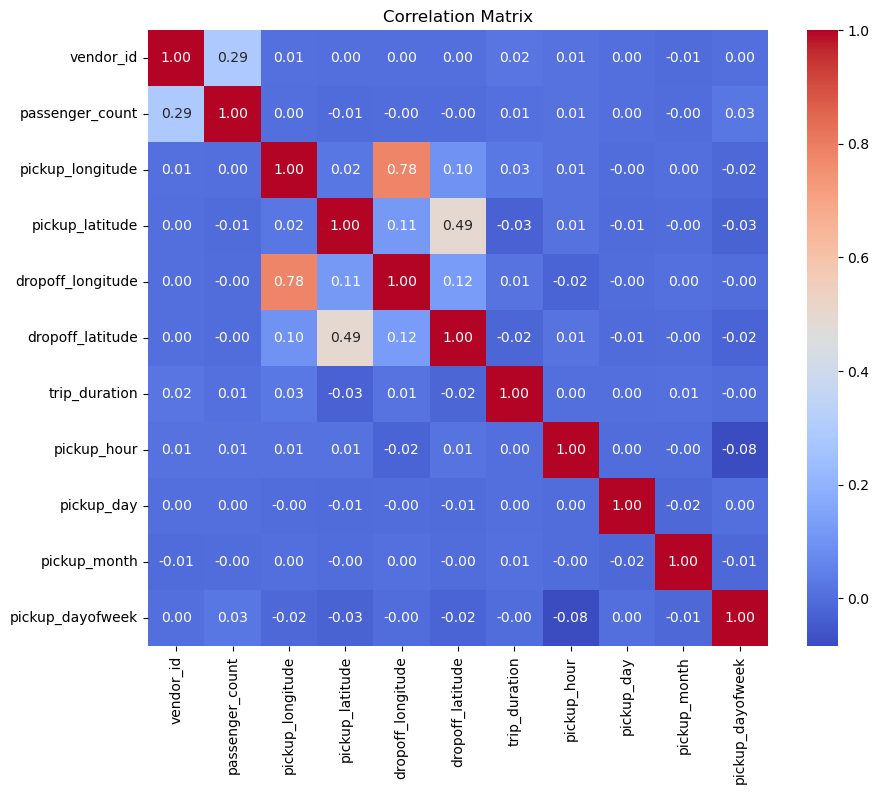

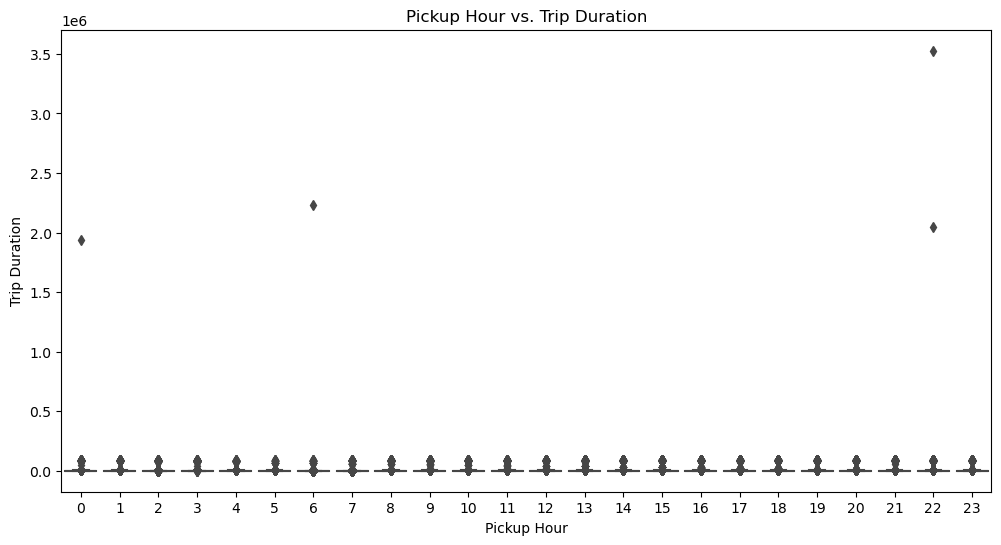

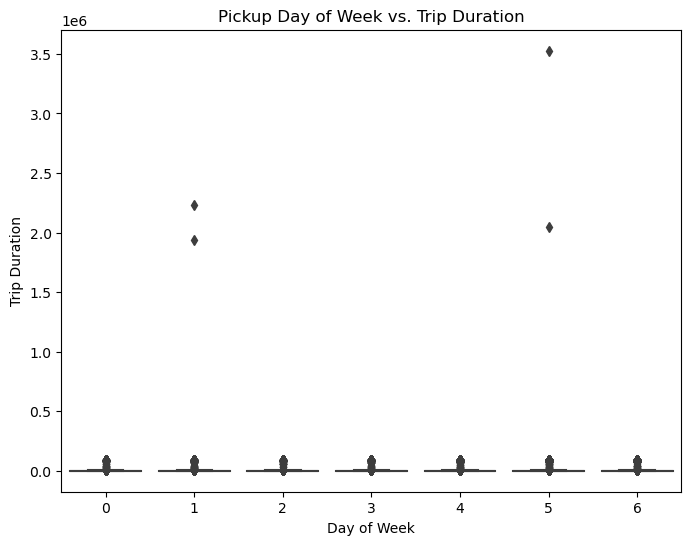

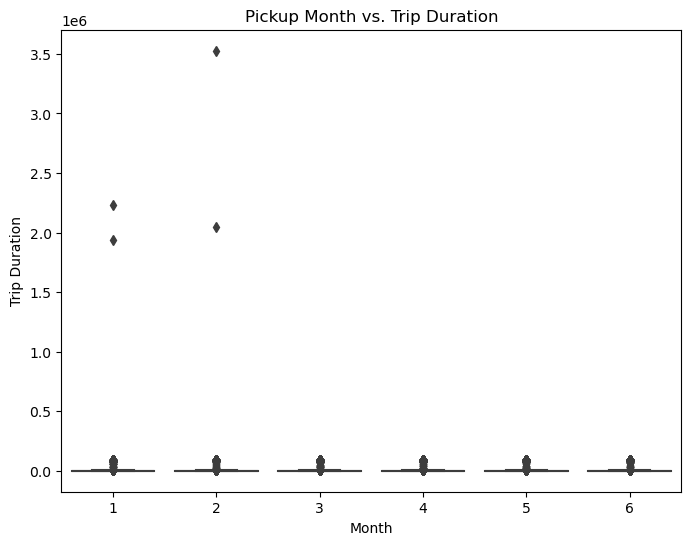

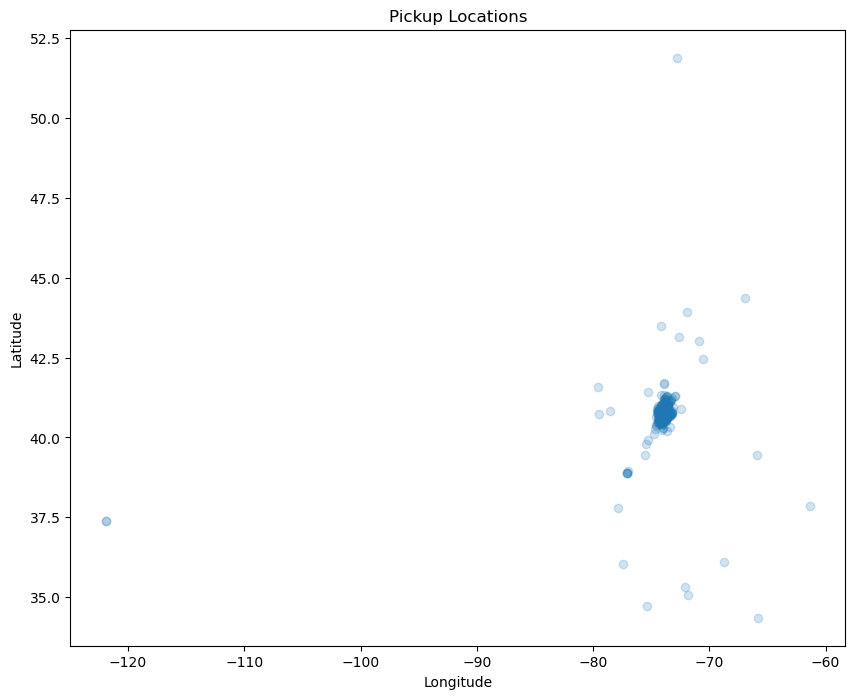

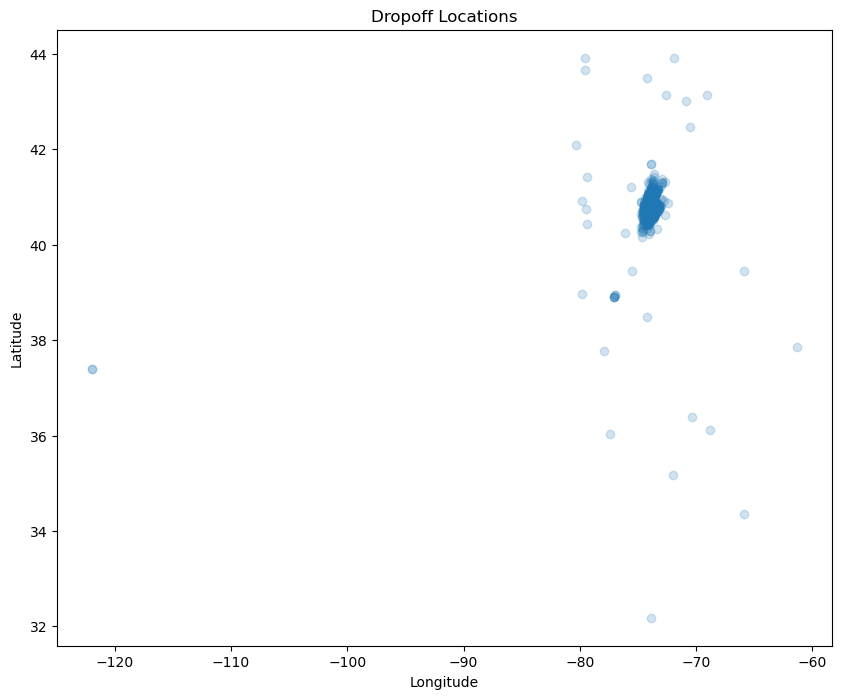

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import pickle
from sklearn.metrics import mean_absolute_error

selected_columns = ['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
                    'passenger_count', 'pickup_longitude', 'pickup_latitude',
                    'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
                    'trip_duration']

data = pd.read_csv('train.csv', usecols=selected_columns)

data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['pickup_hour'] = data['pickup_datetime'].dt.hour
data['pickup_day'] = data['pickup_datetime'].dt.day
data['pickup_month'] = data['pickup_datetime'].dt.month
data['pickup_dayofweek'] = data['pickup_datetime'].dt.dayofweek


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='pickup_hour', y='trip_duration', data=data)
plt.title('Pickup Hour vs. Trip Duration')
plt.xlabel('Pickup Hour')
plt.ylabel('Trip Duration')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='pickup_dayofweek', y='trip_duration', data=data)
plt.title('Pickup Day of Week vs. Trip Duration')
plt.xlabel('Day of Week')
plt.ylabel('Trip Duration')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='pickup_month', y='trip_duration', data=data)
plt.title('Pickup Month vs. Trip Duration')
plt.xlabel('Month')
plt.ylabel('Trip Duration')
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(data['pickup_longitude'], data['pickup_latitude'], alpha=0.2)
plt.title('Pickup Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(data['dropoff_longitude'], data['dropoff_latitude'], alpha=0.2)
plt.title('Dropoff Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



data['distance_km'] = data.apply(lambda row: haversine_distance(row['pickup_latitude'],
                                                                row['pickup_longitude'],
                                                                row['dropoff_latitude'],
                                                                row['dropoff_longitude']), axis=1)
numeric_features = ['passenger_count', 'pickup_longitude', 'pickup_latitude',
                    'dropoff_longitude', 'dropoff_latitude']
categorical_features = ['vendor_id', 'store_and_fwd_flag']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


Training model with 3 hidden layers, 128 nodes per layer, and learning rate 0.001...
Validation loss did not improve for 3 consecutive epochs. Stopping training.


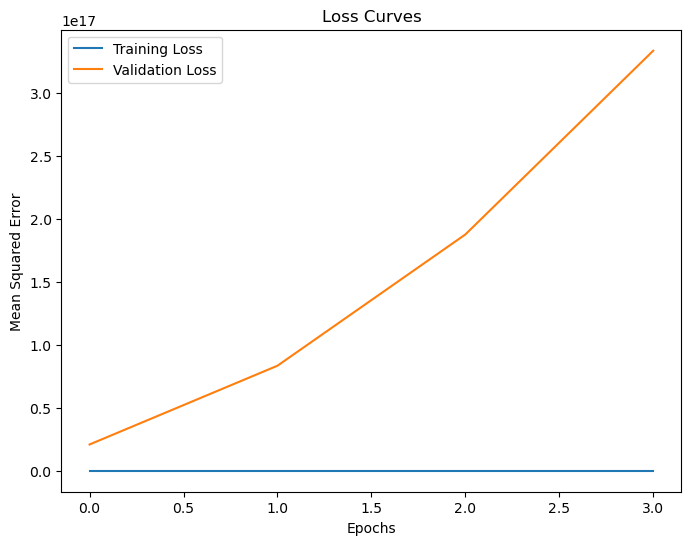

r2 score:  -6351041187.293893
Training model with 2 hidden layers, 64 nodes per layer, and learning rate 0.01...
Validation loss did not improve for 3 consecutive epochs. Stopping training.


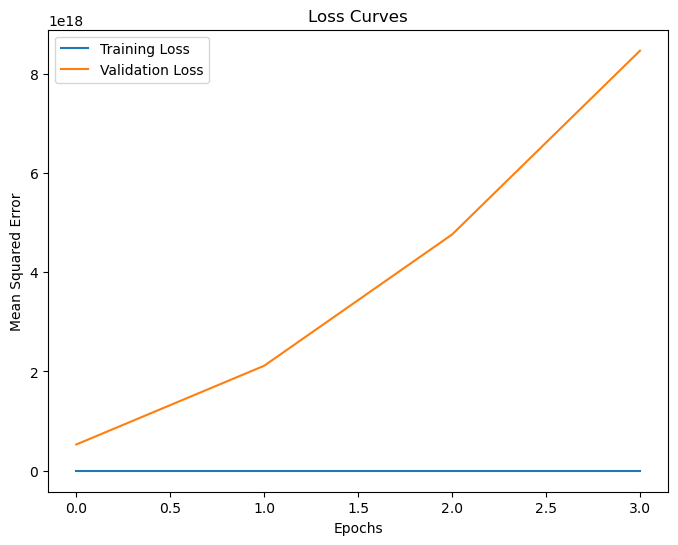

r2 score:  -161236732149.21725
Training model with 1 hidden layers, 32 nodes per layer, and learning rate 0.005...
Validation loss did not improve for 3 consecutive epochs. Stopping training.


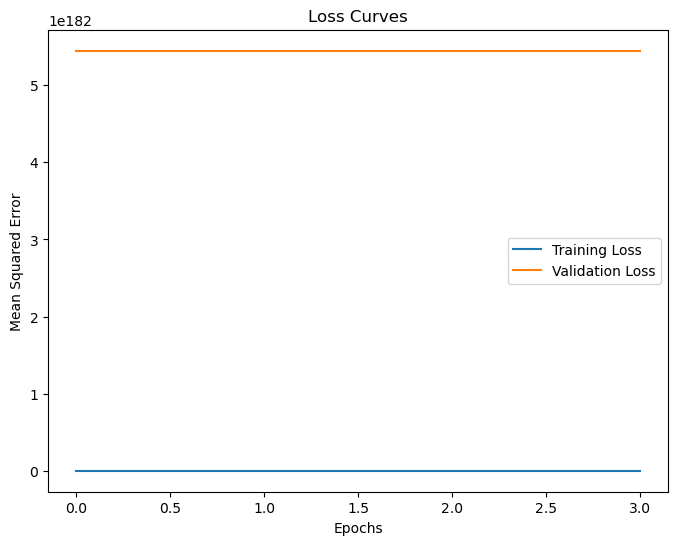

r2 score:  -1.0382849234623967e+175


In [8]:
X = preprocessor.fit_transform(data.drop(columns=['trip_duration']))
y = data['trip_duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

configurations = [
    {'hidden_layers': 3, 'nodes_per_layer': 128, 'learning_rate': 0.001},
    {'hidden_layers': 2, 'nodes_per_layer': 64, 'learning_rate': 0.01},
    {'hidden_layers': 1, 'nodes_per_layer': 32, 'learning_rate': 0.005}
]

# Training loop
for config in configurations:
    print(f"Training model with {config['hidden_layers']} hidden layers, {config['nodes_per_layer']} nodes per layer, and learning rate {config['learning_rate']}...")
    
    # Create neural network with specified configuration
    neural_network = NeuralNetwork(input_size=X_train.shape[1], 
                                   hidden_nodes=config['nodes_per_layer'], 
                                   nodes_per_layer=config['hidden_layers'], 
                                   output_size=1, 
                                   activation_function=SigmoidLayer)  
    
    epochs = 1000
    learning_rate = config['learning_rate']
    train_losses = []
    val_losses = []
    for epoch in range(epochs):
        train_loss = neural_network.train(X_train, y_train.values.reshape(-1, 1), learning_rate)
        train_losses.append(train_loss)
        
        val_predictions = neural_network.forward(X_test)
        val_loss = mean_squared_error(y_test.values.reshape(-1, 1), val_predictions)
        val_losses.append(val_loss)
        
        if len(val_losses) > 3 and val_losses[-1] >= val_losses[-2] >= val_losses[-3]:
            print(f"Validation loss did not improve for 3 consecutive epochs. Stopping training.")
            break
    
    plt.figure(figsize=(8, 6))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.title('Loss Curves')
    plt.legend()
    plt.show()

    test_predictions = neural_network.forward(X_test)
    r2 = r2_score(y_test, test_predictions)
    print("r2 score: ",r2)
    
    with open(f'neural_network_config_{config["hidden_layers"]}_{config["nodes_per_layer"]}.w', 'wb') as file:
        weights = []
        for layer in neural_network.hidden_layers:
            weights.append(layer.get_weights())
        weights.append(neural_network.output_layer.get_weights())
        pickle.dump(weights, file)